## Дипломная работа по курсу «Python для анализа данных»

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15,7
title_font = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'bold'}
axis_font = {'fontname':'Arial', 'size':'24', 'weight':'ultralight'}
ticks_font = {'fontname':'Arial', 'size':'20', 'weight':'ultralight'}

import seaborn as sns

### 1. Загрузить файл hr.csv (можно найти во сложении к заданию)

In [2]:
hr_data = pd.read_csv('hr.csv')
hr_data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [4]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

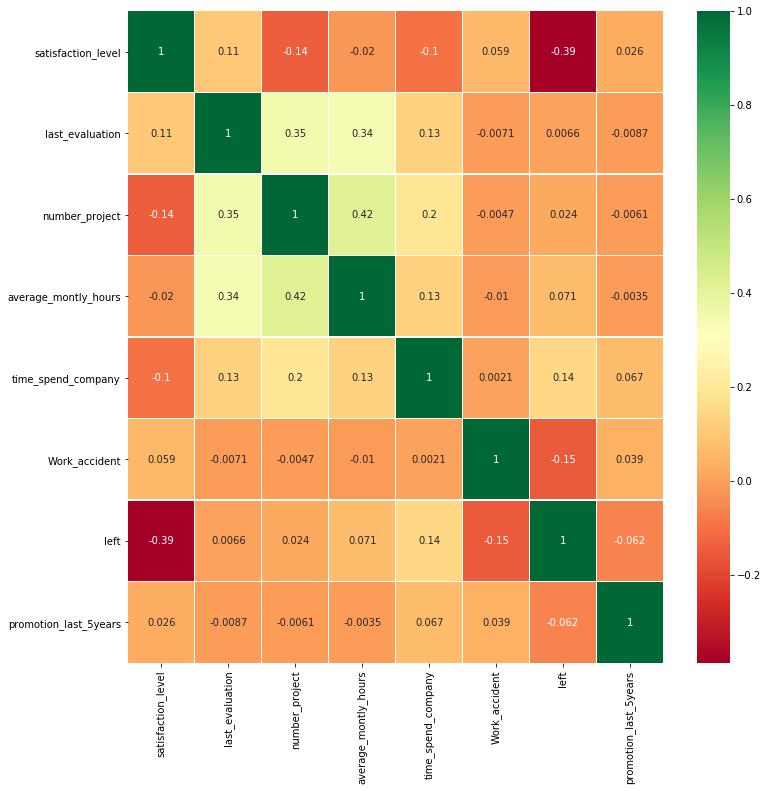

In [5]:
sns.heatmap(hr_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

### 4. Визуализировать несколько взаимосвязей между переменными

- **Влияние уровня зарплаты и нагрузки на уровень удовлетворённости с разбивкой по департаментам** 

<Figure size 1080x504 with 0 Axes>

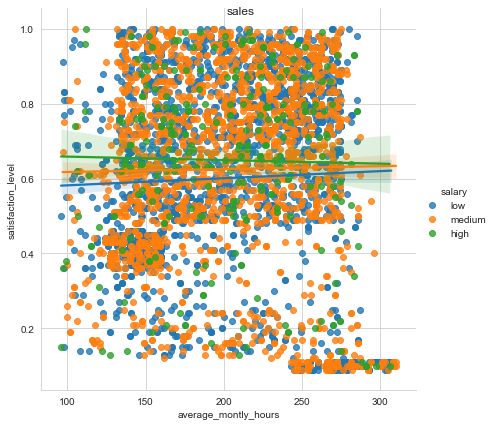

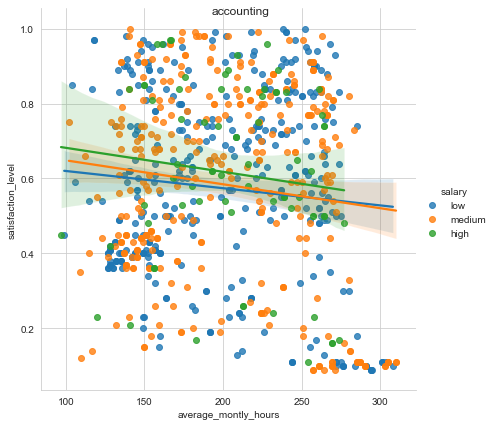

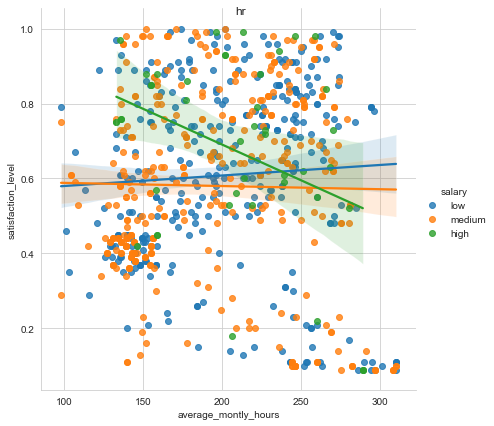

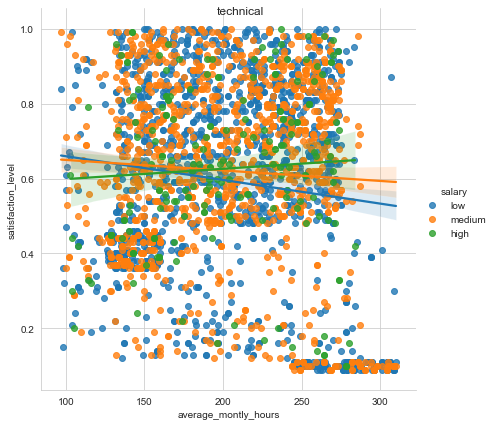

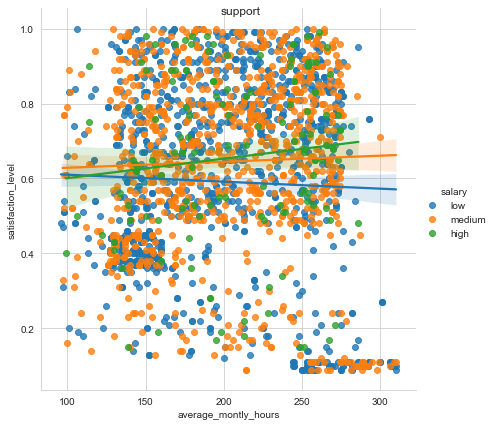

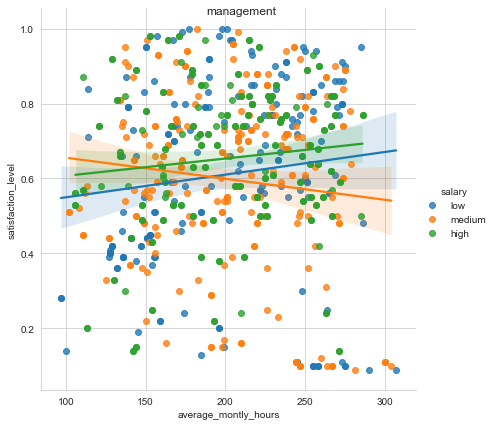

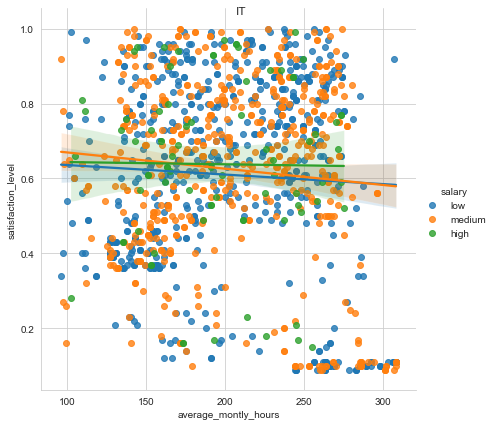

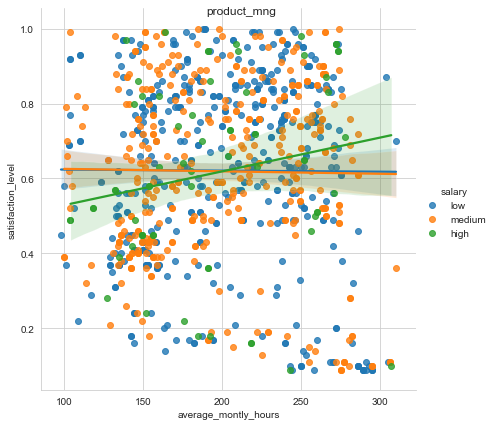

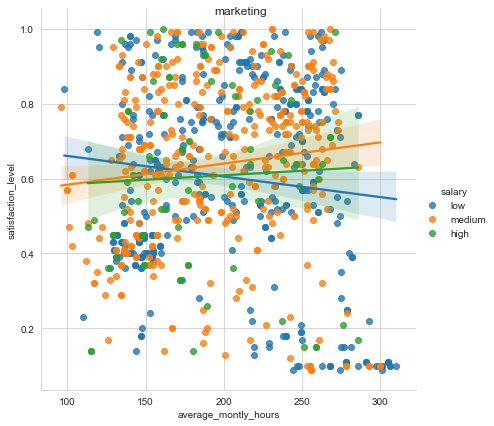

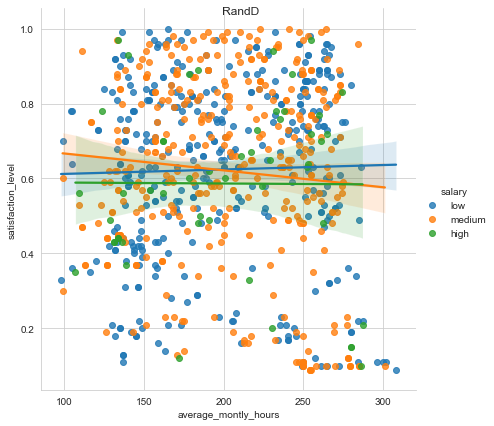

In [6]:
departments_tuple = tuple(hr_data.sales.unique())

f = plt.figure()
gs = f.add_gridspec(len(departments_tuple), 1)
sns.set_style("whitegrid")

for i, department in enumerate(departments_tuple):
    sns.lmplot(x='average_montly_hours', y='satisfaction_level', hue='salary',
               data=hr_data[(hr_data.sales == department)], height=6, aspect=1.0,
               hue_order=['low','medium','high']).fig.suptitle(department, fontsize=12)


- **Уровень удовлетворённости с разбивкой по проектам в целом**

Боксплоты с группировкой по проектам и по уровню удовлетворённости

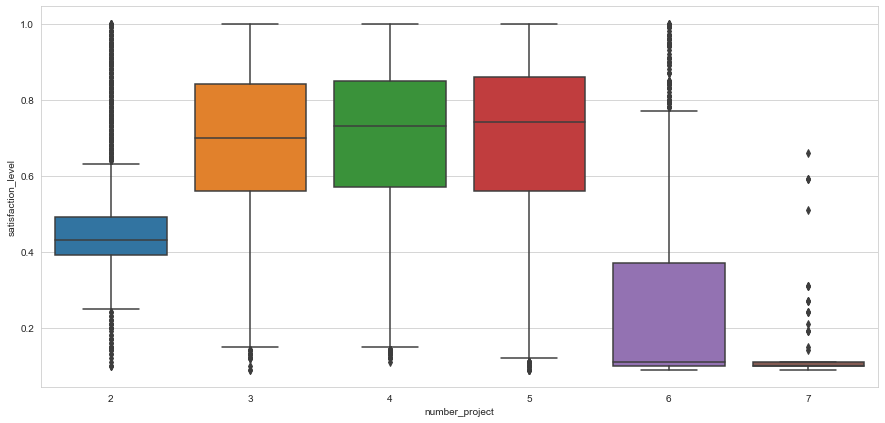

In [7]:
ax = sns.boxplot(x="number_project", y="satisfaction_level", 
            data=hr_data)

In [8]:
hr_data_quitted = hr_data[hr_data.left == 1].groupby(['number_project','Work_accident']).count().left.unstack()
hr_data_quitted.columns = ['Voluntary_dismissal', 'Work_accident']
hr_data_quitted

,Voluntary_dismissal,Work_accident
number_project,,
2,1494,73
3,71,1
4,382,27
5,583,29
6,620,35
7,252,4


Text(0.5, 1.0, 'Quitted statistics')

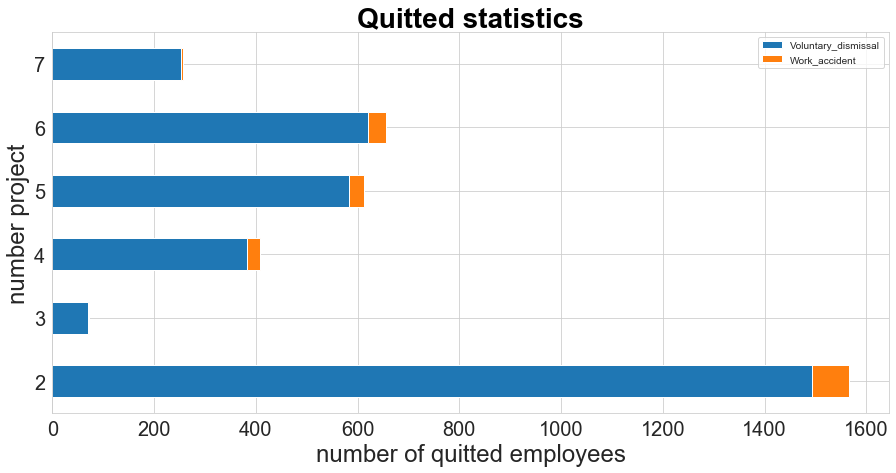

In [9]:
hr_data_quitted.plot.barh(rot=0, stacked=True)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.xlabel('number of quitted employees', **axis_font)
plt.ylabel('number project', **axis_font)
plt.title('Quitted statistics', **title_font)

- **Распределение показателя "Степень удовлетворённости" среди уволившихся сотрудников без дисциплинарного взыскания с распределением по уровню зарплаты**

Text(0.5, 1.0, 'Quitted statistics "satisfaction level - salary"')

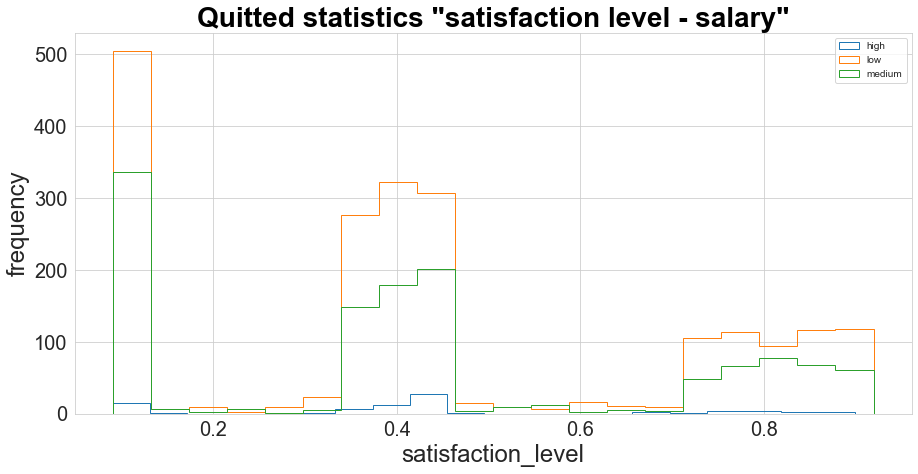

In [10]:
(
    hr_data[(hr_data.left == 1)&(hr_data.Work_accident == 0)].groupby('salary').satisfaction_level.
    plot.hist(bins=20, histtype='step', stacked=True, fill=False)
)

plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.xlabel('satisfaction_level', **axis_font)
plt.ylabel('frequency', **axis_font)
plt.legend()
plt.title('Quitted statistics "satisfaction level - salary"', **title_font)

- **Распределение показателя "Степень удовлетворённости" среди уволившихся сотрудников без дисциплинарного взыскания, не получивших повышение**

Text(0.5, 1.0, 'Quitted statistics "satisfaction level - promotion for the last 5years"')

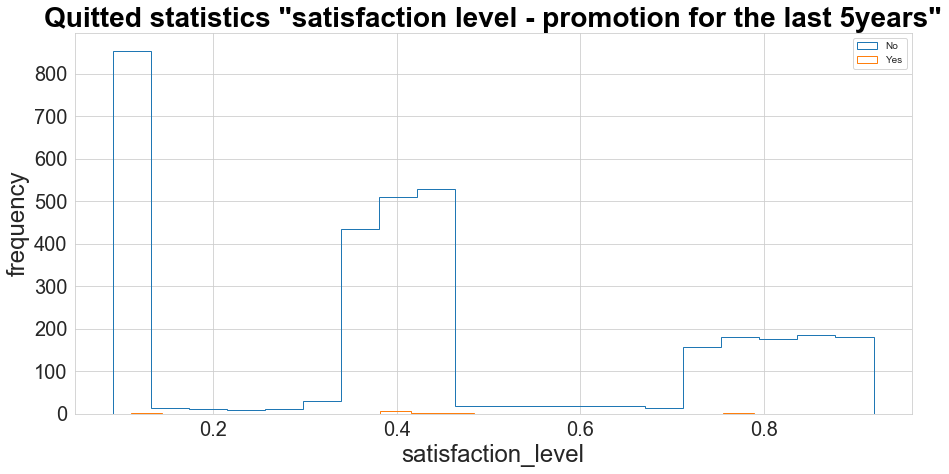

In [11]:
(
    hr_data[(hr_data.left == 1)&(hr_data.Work_accident == 0)].groupby('promotion_last_5years').satisfaction_level.
    plot.hist(bins=20, histtype='step', stacked=True, fill=False)
)

plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.xlabel('satisfaction_level', **axis_font)
plt.ylabel('frequency', **axis_font)
plt.legend(['No','Yes'])
plt.title('Quitted statistics "satisfaction level - promotion for the last 5years"', **title_font)

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

### Метод 1

In [12]:
from scipy import stats

for department in departments_tuple:
    print(f'Департамент {department}')
    comparison_1 = stats.ttest_ind(hr_data[(hr_data.sales == department)]['number_project'],  hr_data[(hr_data.sales == department)]['satisfaction_level'])
    print(f'Сравнение "number_project" и "satisfaction_level": t-stat= {comparison_1[0]}, p-value = {comparison_1[1]}')
    comparison_2 = stats.ttest_ind(hr_data[(hr_data.sales == department)]['last_evaluation'],  hr_data[(hr_data.sales == department)]['left'])
    print(f'Сравнение "last_evaluation" и "left": t-stat= {comparison_2[0]}, p-value = {comparison_2[1]}\n')
#     print(stats.ttest_ind(hr_data[(hr_data.sales == department)]['number_project'],  hr_data[(hr_data.sales == department)]['satisfaction_level']))

Департамент sales
Сравнение "number_project" и "satisfaction_level": t-stat= 160.47764103370346, p-value = 0.0
Сравнение "last_evaluation" и "left": t-stat= 64.58975584211261, p-value = 0.0

Департамент accounting
Сравнение "number_project" и "satisfaction_level": t-stat= 69.79662835053352, p-value = 0.0
Сравнение "last_evaluation" и "left": t-stat= 26.37342548312547, p-value = 1.0779897680440467e-126

Департамент hr
Сравнение "number_project" и "satisfaction_level": t-stat= 66.25571176851773, p-value = 0.0
Сравнение "last_evaluation" и "left": t-stat= 23.33409703728236, p-value = 9.152144113545695e-103

Департамент technical
Сравнение "number_project" и "satisfaction_level": t-stat= 132.78639467350413, p-value = 0.0
Сравнение "last_evaluation" и "left": t-stat= 51.60412405316248, p-value = 0.0

Департамент support
Сравнение "number_project" и "satisfaction_level": t-stat= 121.59687430070164, p-value = 0.0
Сравнение "last_evaluation" и "left": t-stat= 48.119089679697666, p-value = 0.0


### Метод 2

In [13]:
import researchpy as rp
rp.summary_cont(hr_data.groupby('sales')['satisfaction_level'])

,N,Mean,SD,SE,95% Conf.,Interval
sales,,,,,,
IT,1227,0.618142,0.249903,0.007134,0.604153,0.632131
RandD,787,0.619822,0.245269,0.008743,0.602675,0.636969
accounting,767,0.582151,0.255235,0.009216,0.564076,0.600226
hr,739,0.598809,0.247929,0.009120,0.580921,0.616697
management,630,0.621349,0.227747,0.009074,0.603551,0.639148
marketing,858,0.618601,0.244280,0.008340,0.602246,0.634957
product_mng,902,0.619634,0.242279,0.008067,0.603814,0.635454
sales,4140,0.614447,0.250251,0.003889,0.606823,0.622071
support,2229,0.618300,0.246406,0.005219,0.608068,0.628531


In [14]:
descriptives, results = rp.ttest(hr_data.number_project, hr_data.satisfaction_level)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,number_project,14999.0,3.803054,1.232592,0.010064,3.783326,3.822781
1,satisfaction_level,14999.0,0.612834,0.248631,0.002030,0.608854,0.616813
2,combined,29998.0,2.207944,1.826194,0.010544,2.187277,2.228610


In [15]:
results

,Independent t-test,results
0,Difference (number_project - satisfaction_leve...,3.1902
1,Degrees of freedom =,29996.0000
2,t =,310.7220
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,3.5880
7,Hedge's g =,3.5879
8,Glass's delta =,2.5882
9,r =,0.8735


Difference < 0 p value = pvalue = 1,0000 для гипотезы, что разницы между двумя переменными отсутствует (гипотеза опровергается, имеется статистическое различие между атрибутами)

r = 0,8735 коэффициент корреляции Пирсона говорит о наличии прямой линейной взаимосвязи параметров.

In [16]:
descriptives, results = rp.ttest(hr_data.last_evaluation, hr_data.left)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,last_evaluation,14999.0,0.716102,0.171169,0.001398,0.713362,0.718841
1,left,14999.0,0.238083,0.425924,0.003478,0.231266,0.244899
2,combined,29998.0,0.477092,0.403087,0.002327,0.472531,0.481654


In [17]:
results

,Independent t-test,results
0,Difference (last_evaluation - left) =,0.4780
1,Degrees of freedom =,29996.0000
2,t =,127.5363
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.4727
7,Hedge's g =,1.4727
8,Glass's delta =,2.7927
9,r =,0.5930


In [18]:
promoted = hr_data[hr_data.promotion_last_5years == 1]
not_promoted = hr_data[hr_data.promotion_last_5years != 1]
descriptives, results = rp.ttest(not_promoted.satisfaction_level, promoted.satisfaction_level)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,satisfaction_level,14680.0,0.611895,0.249281,0.002057,0.607862,0.615928
1,satisfaction_level,319.0,0.656019,0.212489,0.011897,0.632612,0.679426
2,combined,14999.0,0.612834,0.248631,0.002030,0.608854,0.616813


In [19]:
results

,Independent t-test,results
0,Difference (satisfaction_level - satisfaction_...,-0.0441
1,Degrees of freedom =,14997.0000
2,t =,-3.1367
3,Two side test p value =,0.0017
4,Difference < 0 p value =,0.0009
5,Difference > 0 p value =,0.9991
6,Cohen's d =,-0.1775
7,Hedge's g =,-0.1775
8,Glass's delta =,-0.1770
9,r =,0.0256


Можно заметить, что есть разница между уровнем удовлетворённости повышенных и неповышенных за последние 5 лет сотрудников.

### 6. Рассчитать сколько работников работает в каждом департаменте

In [20]:
hr_data[hr_data.left==1].sales.value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: sales, dtype: int64

### 7. Показать распределение сотрудников по зарплатам

In [21]:
salary_stats = hr_data.salary.value_counts()
salary_stats.head()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Text(0.5, 1.0, 'Salary statistics')

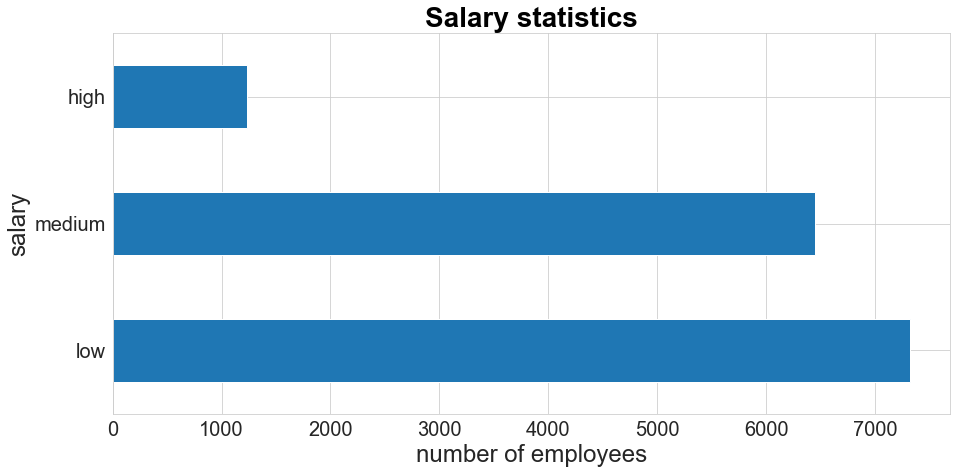

In [22]:
salary_stats.plot.barh(rot=0)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.xlabel('number of employees', **axis_font)
plt.ylabel('salary', **axis_font)
plt.title('Salary statistics', **title_font)

### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [23]:
salary_stats_departments = hr_data.pivot_table(index = 'salary', columns = 'sales', values = 'satisfaction_level', 
                                               aggfunc = 'count', fill_value = 0)
salary_stats_departments.head()

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


Text(0.5, 1.0, 'Departments salary statistics')

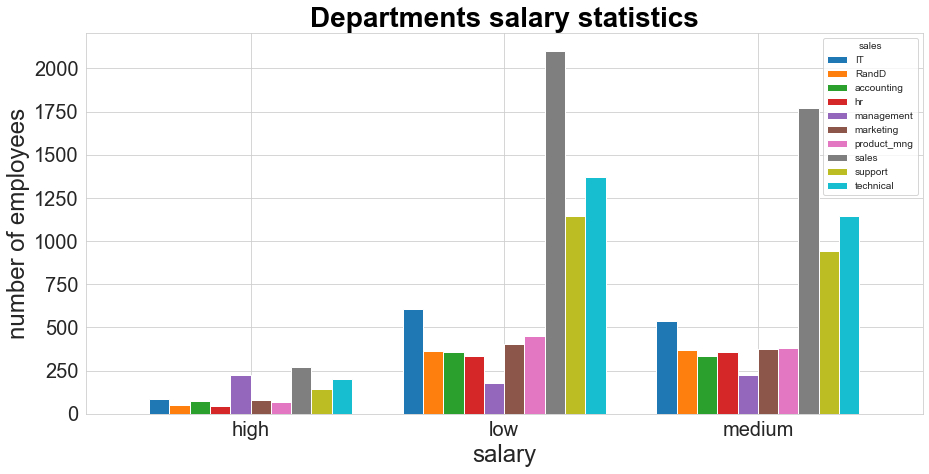

In [24]:
salary_stats_departments.plot.bar(rot=0, width = 0.8)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.xlabel('salary', **axis_font)
plt.ylabel('number of employees', **axis_font)
plt.title('Departments salary statistics', **title_font)

### 9. Сколько сотрудников покинули компанию

In [25]:
quitted = len(hr_data[hr_data.left==1])
print(f'{quitted} сотрудников покинуло компанию.')

3571 сотрудников покинуло компанию.


### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

### Проверим гипотезу о том, что люди, которые были повышены за последние 5 лет не покинули компанию

In [26]:
descriptives, results = rp.ttest(promoted.left, not_promoted.left)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,left,319.0,0.059561,0.237044,0.013272,0.033449,0.085673
1,left,14680.0,0.241962,0.428286,0.003535,0.235033,0.248891
2,combined,14999.0,0.238083,0.425924,0.003478,0.231266,0.244899


In [27]:
results

,Independent t-test,results
0,Difference (left - left) =,-0.1824
1,Degrees of freedom =,14997.0000
2,t =,-7.5812
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.4291
7,Hedge's g =,-0.4290
8,Glass's delta =,-0.7695
9,r =,0.0618


Difference < 0 p value = 0.0000, значит, что имеется статистическое различие. Выборки не связаны между собой. 

Среднее значение по параметру left у повышенных сотрудников 0.06, у неповышенных 0.24, т.е. уволившихся сотрудников (left=0) среди повышенных меньше. Отсутствие повышения в течение 5 лет и карьерного продвижения может быть одной из причин ухода сотрудников. Однако следует иметь ввиду, что размер выборки повышенных сотрудников в разы превышает выборку неповышенных.

### Проверим гипотезу о том, что люди уходят с проекта №2 чаще (number_project)

In [31]:
project_2 = hr_data[hr_data['number_project']==2]
project_other = hr_data[hr_data['number_project']!=2]

In [32]:
descriptives, results = rp.ttest(project_2.left, project_other.left)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,left,2388.0,0.656198,0.475076,0.009722,0.637134,0.675262
1,left,12611.0,0.158909,0.365606,0.003256,0.152527,0.165290
2,combined,14999.0,0.238083,0.425924,0.003478,0.231266,0.244899


In [33]:
results

,Independent t-test,results
0,Difference (left - left) =,0.4973
1,Degrees of freedom =,14997.0000
2,t =,57.8597
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.2913
7,Hedge's g =,1.2912
8,Glass's delta =,1.0468
9,r =,0.4272


Difference < 0 p value = 1.0000, указывает на наличие связи между выборками. 

Среднее значение по параметру left у повышенных сотрудников из проекта №2 - 0.66, у сотрудников из других проектов - 0.16, т.е. в основном увольняются сотрудники данного отдела.